In [1]:
import pandas as pd
Orders = pd.read_excel("Sample - Superstore (1).xlsx",index_col="Row ID",sheet_name="Orders")

# Categorical Columns

In [48]:
categorical_columns = [cname for cname in Orders.columns if Orders[cname].dtype == "object"]
categorical_columns

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

# overview of the data

In [7]:
Orders.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Unique values in different columns

In [21]:
len(Orders['Customer Name'].unique())
len(Orders['City'].unique())
len(Orders['State'].unique())
len(Orders['Country'].unique())
len(Orders['Region'].unique())
len(Orders['Product Name'].unique())
len(Orders['Category'].unique())
len(Orders['Sub-Category'].unique())

793

531

49

1

4

1850

3

17

# Most Profit Making Cities

In [26]:
Orders.groupby(['Product Name'])['Profit'].sum().sort_values(ascending = True).head()

Product Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bush Advantage Collection Racetrack Conference Table       -1934.3976
Name: Profit, dtype: float64

# Least Profit Making Cities

In [28]:
Orders.groupby(['year'])['Quantity'].sum().head()

year
2014     7581.0
2015     7979.0
2016     9837.0
2017    12476.0
Name: Quantity, dtype: float64

# Cities in which sales are highest

In [57]:
Orders.groupby(['City'])['Sales'].sum().sort_values(ascending = False).head()

City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Name: Sales, dtype: float64

# Cities in which sales are lowest

In [63]:
Orders.groupby(['City'])['Sales'].sum().sort_values(ascending = False).tail()

City
Ormond Beach    2.808
Pensacola       2.214
Jupiter         2.064
Elyria          1.824
Abilene         1.392
Name: Sales, dtype: float64

# Most Profitable Sub-Categories

In [69]:
Orders.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending = False).head()

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

# Least Profitable Sub-Categories

In [67]:
Orders.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending = False).tail()

Sub-Category
Machines      3384.7569
Fasteners      949.5182
Supplies     -1189.0995
Bookcases    -3472.5560
Tables      -17725.4811
Name: Profit, dtype: float64

# Profit by Categories

In [68]:
Orders.groupby(['Category'])['Profit'].sum().sort_values(ascending = False)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

# Profit by Segments

In [4]:
Orders.groupby(['Segment'])['Profit'].sum().sort_values(ascending = False)

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

# Converted order date into days month years

In [27]:
Orders['Order Date'] = pd.to_datetime(Orders['Order Date'])
Orders['day'] = (Orders['Order Date']).dt.day
Orders['month'] = (Orders['Order Date']).dt.month
Orders['year'] = (Orders['Order Date']).dt.year
Orders['year'].unique()

array([2016, 2015, 2014, 2017], dtype=int64)

# Which sub-category has most quantity sold

<AxesSubplot:xlabel='Quantity', ylabel='Sub-Category'>

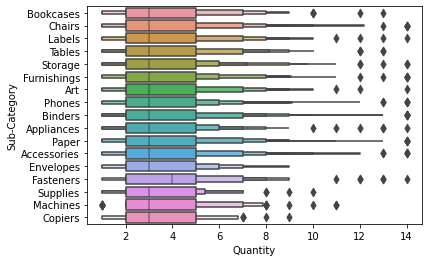

In [23]:
import seaborn as sns
sns.boxenplot(y = 'Sub-Category', x = 'Quantity', data=Orders )

<AxesSubplot:xlabel='count', ylabel='Sub-Category'>

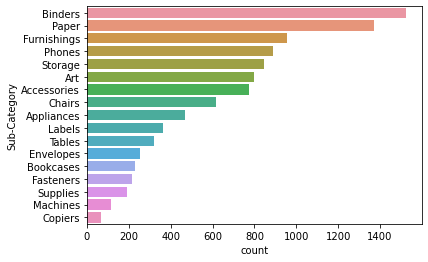

In [34]:
sns.countplot(y = 'Sub-Category', data=Orders, order = Orders['Sub-Category'].value_counts().index )

# Demand according to segments

<AxesSubplot:xlabel='Sales', ylabel='Sub-Category'>

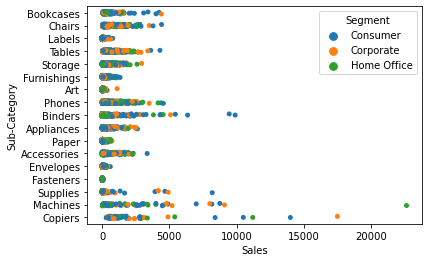

In [38]:
sns.stripplot(y = 'Sub-Category', x = 'Sales', hue = 'Segment', data=Orders )

# Profit according to sub categories

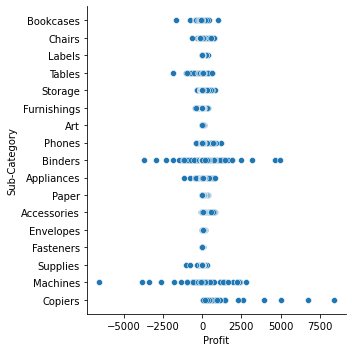

In [40]:
sns.relplot(y = 'Sub-Category', x = 'Profit', data=Orders )

# yearly sales w.r.t categories and segments

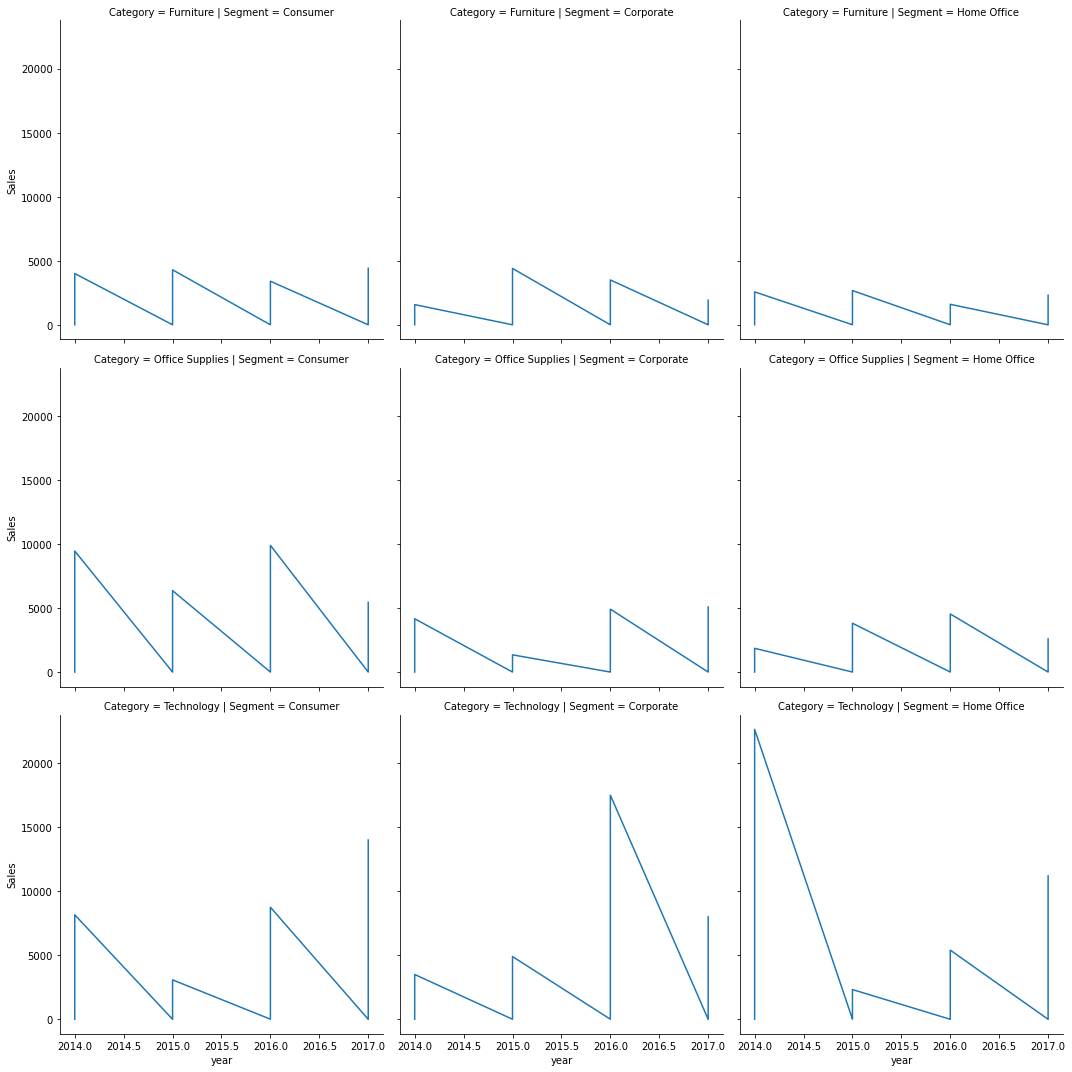

In [45]:
productCount  = sns.relplot(x="year",  y = 'Sales', col= 'Segment' , row= 'Category', estimator = None, kind="line", data =Orders)

# Segments wise sales by Categories

Text(0.5, 1.0, 'Segments wise sales by Categories')

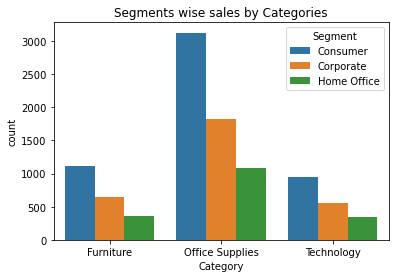

In [52]:
 sns.countplot(x="Category", hue = "Segment", data =Orders).set_title("Segments wise sales by Categories") 

# Ship mode used by different segments

Text(0.5, 1.0, 'Ship Mode used by different Segments')

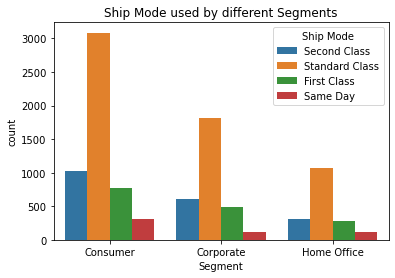

In [24]:
sns.countplot(x="Segment", hue = "Ship Mode", data =Orders).set_title("Ship Mode used by different Segments") 

# Year wise Sales and Profit

286397.0216999999

,Sales,Profit
year,,
2014,484247.4981,49543.9741
2015,470532.5090,61618.6037
2016,609205.5980,81795.1743
2017,733215.2552,93439.2696


Text(0.5, 0, 'Year')

Text(0, 0.5, 'Dollars')

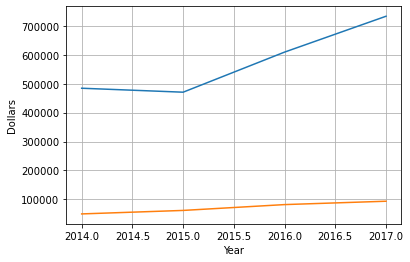

In [18]:
Orders.groupby('year')[['Sales','Profit']].sum()
import matplotlib.pyplot as plt
plt.plot(Orders.groupby('year')[['Sales','Profit']].sum())
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.grid()
plt.show()